# Exercises Tests Part 2

In [24]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

## Theoretical questions

### Question 1:
- Open the file entry `/Gamerps.csv`. Scissors rock paper is a game where you make a choice between these three. However, is there a preference among our scout members regarding the selection test? The expected distribution is proportional. Check whether our count differs from the expected distribution.
    - Which test will you use for this?
    - What is `H0`? `The count in our sample is/is not evenly distributed.`
    - What is the value of `X^2`? (3 significant digits)
    - What is the probability that a sample would have a higher value than `X^2` (p-value)? (3 significant digits)
    - Can `H0` be rejected with `95%` confidence?
    - So can we say that the scout members have a preference?

In [25]:
gamerps = pd.read_csv('../Data/Gamerps.csv')
display(gamerps)

,hand
0,Scissors
1,Paper
2,Paper
3,Scissors
4,Scissors
...,...
70,Scissors
71,Scissors
72,Paper
73,Paper


In [41]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))
print(colored(f"\n\tH0: There is a preference among the people.\n\tH1: There is no preference among the People.", outputColor))

paperSum = 0
scissorsSum = 0
rockSum = 0
total = len(gamerps)

for i in range(total):
    if gamerps['hand'][i] == 'Paper':
        paperSum += 1
    if gamerps['hand'][i] == 'Scissors':
        scissorsSum += 1
    if gamerps['hand'][i] == 'Rock':
        rockSum += 1

print(colored(f"Amount of Paper: {paperSum}", outputColor))
print(colored(f"Amount of Scissors: {scissorsSum}", outputColor))
print(colored(f"Amount of Rock: {rockSum}", outputColor))
print(colored(f"Total: {total}", outputColor))

measured_values = [paperSum,scissorsSum,rockSum]
expected_values = [(total / 3), (total / 3), (total / 3)] # H0
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))

p = 0.95
df = 3 - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

We are going to calculate the Chi-square.

	H0: There is a preference among the people.
	H1: There is no preference among the People.
Amount of Paper: 24
Amount of Scissors: 30
Amount of Rock: 21
Total: 75
X^2 Value: 1.68
P Value: 0.432
Critical value: 5.991464547107979
H0 can not be rejected with 95% confidence.


### Question 2:
- Open the file `/ColorHairBrussels.csv`. This concerns data on the color of the hair of a sample of people in Brussels. The expected distribution of hair colors in Europe are: `30% blonde`, `12% red`, `30% brown`, `25% dark`, and `3% black`. Check whether our count differs from the expected distribution.
     - Which test will you use for this?
     - What is `H0`? `The hair color count in our sample does/does not deviate from the expected distribution.`
     - What `X^2` value do you find?
     - What `p-value` do you find?
     - Can `H0` be rejected with a reliability of `95%` or not?
     - Is there a deviation in Brussels compared to the expected distribution?

In [27]:
colorHairBrussels = pd.read_csv('../Data/ColorHairBrussels.csv')
display(colorHairBrussels)

,hair
0,Dark
1,Blonde
2,Brown
3,Blonde
4,Brown
...,...
241,Brown
242,Red
243,Blonde
244,Brown


In [42]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))
print(colored(f"\n\tH0: The hair color count in our sample does not deviate from the expected distribution.\n\tH1: The hair color count in our sample does deviate from the expected distribution.", outputColor))

blondeSum = 0
redSum = 0
brownSum = 0
darkSum = 0
blackSum = 0
total = len(colorHairBrussels)

for i in range(total):
    if colorHairBrussels['hair'][i] == 'Blonde':
        blondeSum += 1
    if colorHairBrussels['hair'][i] == 'Red':
        redSum += 1
    if colorHairBrussels['hair'][i] == 'Brown':
        brownSum += 1
    if colorHairBrussels['hair'][i] == 'Dark':
        darkSum += 1
    if colorHairBrussels['hair'][i] == 'Black':
        blackSum += 1

print(colored(f"Amount of Blonde: {blondeSum}", outputColor))
print(colored(f"Amount of Red: {redSum}", outputColor))
print(colored(f"Amount of Brown: {brownSum}", outputColor))
print(colored(f"Amount of Dark: {darkSum}", outputColor))
print(colored(f"Amount of Black: {blackSum}", outputColor))
print(colored(f"Total: {total}", outputColor))

measured_values = [blondeSum, redSum, brownSum, darkSum, blackSum]
expected_values = [total * 0.3, total * 0.12, total * 0.3, total * 0.25, total * 0.03]
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))

p = 0.95
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

We are going to calculate the Chi-square.

	H0: The hair color count in our sample does not deviate from the expected distribution.
	H1: The hair color count in our sample does deviate from the expected distribution.
Amount of Blonde: 76
Amount of Red: 19
Amount of Brown: 83
Amount of Dark: 65
Amount of Black: 3
Total: 246
X^2 Value: 7.76
P Value: 0.101
Critical value: 9.487729036781154
H0 can not be rejected with 95% confidence.


### Question 3:
- We wish to conduct a survey on students' favorite browser. We expect the following distribution:
     - Internet explorer: `8`
     - Opera: `10`
     - Mozilla Firefox: `10`
     - Google chrome: `12`
- When inquiring about `1` class group, the distribution appears as follows:
     - Internet explorer: `17`
     - Opera: `10`
     - Mozilla Firefox: `8`
     - Google chrome: `5`

- Question:
     - Which test are you going to apply?
     - Is this deviation within our expectations (`alpha=0.01`) Yes/No?
     - What is the critical value of this data?
     - What `X^2` value do you find?
     - What p-value do you find?

In [43]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))

measured_values = [17, 10, 8, 5]
expected_values = [8, 10, 10, 12]
chisquare = chisquare(measured_values, expected_values)

a = 0.01
p = 1 - a
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)

if chisquare.pvalue <= a:
    print(colored(f"The deviation is significant because the p-value is less than alpha.", outputColor))
else:
    print(colored(f"The deviation is not significant because the p-value is greater than alpha.", outputColor))

print(colored(f"Critical Value: {round(critical_value, 3)}", outputColor))
print(colored(f"X^2: {round(chisquare.statistic, 3)}", outputColor))
print(colored(f"P-Value: {round(chisquare.pvalue, 3)}", outputColor))

We are going to calculate the Chi-square.
The deviation is significant because the p-value is less than alpha.
Critical Value: 11.345
X^2: 14.608
P-Value: 0.002


### Question 4:
- A programmer has written a Python class to generate random integers between `0` and `10`. This code looks like this:

In [31]:
class Random:
    def __init__(self)-> None:
        self.i = 0
        self.j = 0

    def random_between_0_and_10(self) -> int:
        r = abs(math.sin(51 * self.i ** 2 + math.cos(80 * self.j)) + math.sin(300 * self.j + 3 * math.sin(111 * self.i - self.j)))
        self.j += 1
        if self.j > 100:
            self.i +=1
        if self.i > 100:
            self.i = 0
            self.j = 0
        return math.floor(r * 5.5)

- Write a Python program that generates `1100` random numbers and check whether this random number generator works properly (we expect each number `0-10` to appear equally). Use `alpha=0.05`.
     - What `X^2` value do you find?
     - What p-value do you find?
     - What is the confidence interval for `alpha=0.05`?
     - What decision can you make?

In [32]:
# 1
# Chi-kwadraat toets

# 2
random = Random()
random_numbers = [random.random_between_0_and_10() for _ in range(1100)]
measured_values = [random_numbers.count(i) for i in range(11)]
expected_values = [100 for _ in range(11)]
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))

# 3
p = 0.95
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

# 4
if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

X^2 Value: 239.18
P Value: 0.0
Critical value: 18.307038053275146
H0 can be rejected with 95% confidence.


## Practical exercises (Python)

In [33]:
studentQuestions = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
display(studentQuestions)

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,7/18,Rechts,45.0,185,O,negatief,0,De maanlanding is in scne gezet om de Russen ...,Categorie AM: Bromfietsen met een maximumsnelh...,"buiten de stad (een dorp, een gehucht, het pla...",...,10,3,8,8,2,5.0,"1=Panter,2=Poema,3=Wolf,4=Vos,5=Bever,6=Bruine...",Software engineering 1,User interfaces 1,26-30 uren
85,9/18,Rechts,43.0,184,O,Weet ik niet,2,De aanslagen van 9/11 in NY werden niet door t...,Categorie AM: Bromfietsen met een maximumsnelh...,"buiten de stad (een dorp, een gehucht, het pla...",...,8,5,7,8,4,0.0,"1=Panter,2=Poema,3=Vos,4=Wolf,5=Bruine beer,6=...",Data science 1,Programmeren 1 - Embedded,11-15 uren
86,4/18,Links,45.5,190,Weet ik niet,Weet ik niet,0,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,8,9,5.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bever,5=Das,6=Was...",User interfaces 1,Data science 1,16-20 uren
87,8/18,Rechts,45.0,188,A,positief,1,NaN,Categorie B: Wagens.,in een stad,...,8,6,6,7,6,4.0,"1=Otter,2=Wasbeer,3=Vos,4=Bruine beer,5=Bever,...",Netwerken 1,Data science 1,16-20 uren


### Exercise 1:
- Add a column to the data frame and place the stature of a person expressed in shoe size (i.e. height divided by shoe size)

In [34]:
studentQuestions['stature'] = studentQuestions['lengte'] / studentQuestions['schoenmaat']
display(studentQuestions[['stature','lengte','schoenmaat']])

,stature,lengte,schoenmaat
0,4.279070,184,43.0
1,3.880952,163,42.0
2,4.066667,183,45.0
3,3.977273,175,44.0
4,4.023256,173,43.0
...,...,...,...
84,4.111111,185,45.0
85,4.279070,184,43.0
86,4.175824,190,45.5
87,4.177778,188,45.0


### Exercise 2:
- Someone claims that the ratio of height to shoe size of a human being is `4.2` with a standard deviation of `0.05`. Can you agree with this based on the data from the questionnaire? And from what significance level (`alpha`)?

In [35]:
# Null Hypothesis (H0): The true ratio of height to shoe size is 4.2.
# Alternative Hypothesis (H1): The true ratio of height to shoe size is not equal to 4.2.

# Calculate the sample mean and standard deviation
sample_mean = studentQuestions['stature'].mean()
sample_std = studentQuestions['stature'].std()

# Calculate the t-statistic
n = len(studentQuestions)
t_statistic = (sample_mean - 4.2) / (sample_std / math.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - student.cdf(abs(t_statistic), df=n - 1))

# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print(colored(f"Reject the null hypothesis. There is evidence to suggest that the ratio is different from 4.2.", outputColor))
else:
    print(colored(f"Fail to reject the null hypothesis. The data does not provide enough evidence to suggest a difference from 4.2.", outputColor))
    
mu = 4.2
data = ttest_1samp(studentQuestions['stature'], mu)
print(colored(f"P Value: {data.pvalue}", outputColor))

Reject the null hypothesis. There is evidence to suggest that the ratio is different from 4.2.
P Value: 0.04564487432748237


### Exercise 3:
- Determine the `99%` confidence interval for the distance to KdG (remove the outliers first!).

In [36]:
distance = no_outliers(studentQuestions['afstand tot KdG'])
s = distance.std() # s = Sample standard deviation
x_bar = distance.mean() # x_bar = Sample mean
n = len(distance) # n = Population size
df = n - 1 # df = Degrees of freedom
p = 0.99 # p = Confidence level


factor = student.ppf(p, df=df)                      # factor = Z-score
print(colored(f"Factor: {factor}", outputColor))    # Z-score
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Low:  -16.650000000000002
High: 43.75
Len:  89
Outliers: [48. 44. 44.] 

Factor: 2.371022043913763
Confidence Interval: (10.652390235958102, 16.5383074384605)


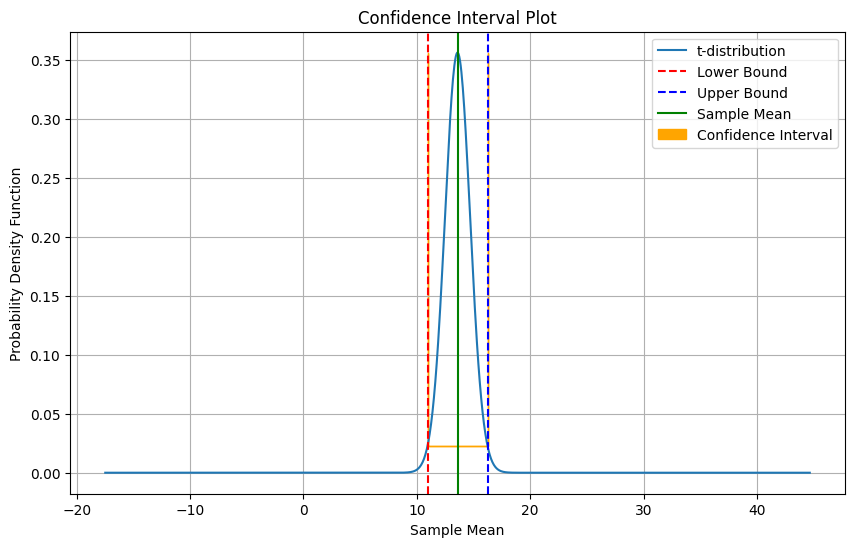

In [37]:
plot_confidence_interval(n, x_bar, s, df, factor)

### Exercise 4:
- Someone claims that the average distance to KdG is `19` km. From what significance level (`alpha`) can you not refute the statement?

In [38]:
# Null Hypothesis (H0): The true average distance to KdG is 19 km.
# Alternative Hypothesis (H1): The true average distance to KdG is not equal to 19 km.

# Calculate the t-statistic
mu=19
data = ttest_1samp(distance,mu)
print(colored(f"P Value: {data.pvalue}", outputColor))

P Value: 5.769460649567065e-06


### Exercise 5:
- Distribution among the different blood groups `{"O":0.45, "A":0.4, "B":0.1, "AB":0.05}`. Can you refute this based on the sample? Take `alpha = 0.05`.

In [39]:
bloodType = studentQuestions['bloedgroep']

oSum = 0
aSum = 0
bSum = 0
abSum = 0

for i in range(len(bloodType)):
    if bloodType[i] == 'O':
        oSum += 1
    if bloodType[i] == 'A':
        aSum += 1
    if bloodType[i] == 'B':
        bSum += 1
    if bloodType[i] == 'AB':
        abSum += 1
total = oSum + aSum + bSum + abSum

print(colored(f"Amount of O: {oSum}", outputColor))
print(colored(f"Amount of A: {aSum}", outputColor))
print(colored(f"Amount of B: {bSum}", outputColor))
print(colored(f"Amount of AB: {abSum}", outputColor))
print(colored(f"Total: {total}", outputColor))

Amount of O: 27
Amount of A: 18
Amount of B: 7
Amount of AB: 3
Total: 55


In [40]:
measured_values = [oSum, aSum, bSum, abSum]
expected_values = [total * 0.45, total * 0.4, total * 0.1, total * 0.05]
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))


p = 0.95
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

X^2 Value: 1.364
P Value: 0.714
Critical value: 7.814727903251179
H0 can not be rejected with 95% confidence.
